#**Problem Statement :**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#**Objective :**
Need to perform clustering to summarize customer segments.

**Dataset link :**  https://www.kaggle.com/imakash3011/customer-personality-analysis

#**Feature Description :**

**People**

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise




**Products**

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
# Importing Liberies
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys

In [2]:
# for ignoring warning
# Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, 
# where that condition (normally) doesn’t warrant raising an exception and terminating the program. 
# For example, one might want to issue a warning when a program uses an obsolete module.
# Source--> https://docs.python.org/3/library/warnings.html#module-warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
# mounting google drive

##from google.colab import drive

##drive.mount('/content/drive')

#**Loading dataset**

In [4]:
data = pd.read_csv('marketing_campaign.csv',sep="\t" )

In [5]:
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#**Basic infromation about data**

In [6]:
print('Number of datapoints in the dataset: ', len(data))
print('Number of rows {} and columns {}:' .format(data.shape[0],data.shape[1]))
print('Column names:', data.columns)


Number of datapoints in the dataset:  2240
Number of rows 2240 and columns 29:
Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [7]:
data.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#**Data Cleaning**

In this section


*   Data Cleaning
*   Feature Engineering




In order to, get a full grasp of what steps should I be taking to clean the dataset.




In [8]:
# getting information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

###**Conclusion:**


*   There are 14 missing values in Income feature.
*   Dt_Customer indicates the date on that date customer joined the database is not parsed as DateTime.


*   There are some categorical features in our data frame(feature's data type like-> dtype: object). 
So we will need to encode them into numeric forms later.






In [9]:
# Removing missing values
data = data.dropna()
print("Number of data-points after removing the rows with missing values:", len(data))

Number of data-points after removing the rows with missing values: 2216


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

 Creating a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record

##**Feature Engineering**

In [11]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [12]:
# Dt_customer data type is Object
# Changing format of datetime in Dt_Customer (04-09-2012 --> 2012-09-04)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = [] 
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("The newest customer's date in the records:",max(dates))
print("The oldest customer's date in the records:",min(dates))


The newest customer's date in the records: 2014-12-06
The oldest customer's date in the records: 2012-01-08


In [13]:
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [14]:
type(dates)

list

In [15]:
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.d

In [17]:
max(dates)

datetime.date(2014, 12, 6)

In [18]:
dates[0]

datetime.date(2012, 4, 9)

In [19]:
max(dates)-dates[0]

datetime.timedelta(days=971)

In [ ]:
## example of how days are calculated by subtracting dates

#from datetime import date

#d0 = date(2008, 8, 18)
#d1 = date(2008, 9, 26)
#delta = d1 - d0
#print(delta.days)

In [20]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)


# Creating a feature ("Customer_Days") of the number of days the customers started to shop in the store relative to the last recorded date
data["Customer_Days"] = days
print(data[['ID','Dt_Customer','Customer_Days']])

print("*******************************")
print(data.info())
print("*******************************")

# Converting days into numerical
data["Customer_Days"] = pd.to_numeric(data["Customer_Days"], errors="coerce")
print('***************************************')
print('After Creating days into numerical')
print(data[['ID','Dt_Customer','Customer_Days']])

print("*******************************")
print(data.info())
print("*******************************")

         ID Dt_Customer Customer_Days
0      5524  2012-04-09      971 days
1      2174  2014-08-03      125 days
2      4141  2013-08-21      472 days
3      6182  2014-10-02       65 days
4      5324  2014-01-19      321 days
...     ...         ...           ...
2235  10870  2013-06-13      541 days
2236   4001  2014-10-06       61 days
2237   7270  2014-01-25      315 days
2238   8235  2014-01-24      316 days
2239   9405  2012-10-15      782 days

[2216 rows x 3 columns]
*******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2216 non-null   int64          
 1   Year_Birth           2216 non-null   int64          
 2   Education            2216 non-null   object         
 3   Marital_Status       2216 non-null   object         
 4   Income               2216 n

In [21]:
# Exploring the unique values in the categorical features
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [22]:
# Creating new feature Age
# Age of customer today 
data["Age"] = 2021-data["Year_Birth"]
print(data[['ID','Year_Birth','Dt_Customer','Age']])

         ID  Year_Birth Dt_Customer  Age
0      5524        1957  2012-04-09   64
1      2174        1954  2014-08-03   67
2      4141        1965  2013-08-21   56
3      6182        1984  2014-10-02   37
4      5324        1981  2014-01-19   40
...     ...         ...         ...  ...
2235  10870        1967  2013-06-13   54
2236   4001        1946  2014-10-06   75
2237   7270        1981  2014-01-25   40
2238   8235        1956  2014-01-24   65
2239   9405        1954  2012-10-15   67

[2216 rows x 4 columns]


In [23]:
#Create another feature "Money_Spent" indicating the total amount spent by the customer in various categories over the span of two years

data["Money_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ \
                              data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
                      
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent
0      5524        1957  2012-04-09   64         1617
1      2174        1954  2014-08-03   67           27
2      4141        1965  2013-08-21   56          776
3      6182        1984  2014-10-02   37           53
4      5324        1981  2014-01-19   40          422
...     ...         ...         ...  ...          ...
2235  10870        1967  2013-06-13   54         1341
2236   4001        1946  2014-10-06   75          444
2237   7270        1981  2014-01-25   40         1241
2238   8235        1956  2014-01-24   65          843
2239   9405        1954  2012-10-15   67          172

[2216 rows x 5 columns]


In [24]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent','Living_With']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent Living_With
0      5524        1957  2012-04-09   64         1617       Alone
1      2174        1954  2014-08-03   67           27       Alone
2      4141        1965  2013-08-21   56          776     Partner
3      6182        1984  2014-10-02   37           53     Partner
4      5324        1981  2014-01-19   40          422     Partner
...     ...         ...         ...  ...          ...         ...
2235  10870        1967  2013-06-13   54         1341     Partner
2236   4001        1946  2014-10-06   75          444     Partner
2237   7270        1981  2014-01-25   40         1241       Alone
2238   8235        1956  2014-01-24   65          843     Partner
2239   9405        1954  2012-10-15   67          172     Partner

[2216 rows x 6 columns]


In [25]:
# Creating a feature "Children" --> total children in a household that is, kids and teenagers.
data["Children"]=data["Kidhome"]+data["Teenhome"]
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent','Living_With','Children']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent Living_With  Children
0      5524        1957  2012-04-09   64         1617       Alone         0
1      2174        1954  2014-08-03   67           27       Alone         2
2      4141        1965  2013-08-21   56          776     Partner         0
3      6182        1984  2014-10-02   37           53     Partner         1
4      5324        1981  2014-01-19   40          422     Partner         1
...     ...         ...         ...  ...          ...         ...       ...
2235  10870        1967  2013-06-13   54         1341     Partner         1
2236   4001        1946  2014-10-06   75          444     Partner         3
2237   7270        1981  2014-01-25   40         1241       Alone         0
2238   8235        1956  2014-01-24   65          843     Partner         1
2239   9405        1954  2012-10-15   67          172     Partner         2

[2216 rows x 7 columns]


In [27]:
# Creating feature indicating "Family_Size" --> To get further clarity of household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
print(data[['ID','Year_Birth','Age','Money_Spent','Living_With','Children','Family_Size']])

         ID  Year_Birth  Age  Money_Spent Living_With  Children  Family_Size
0      5524        1957   64         1617       Alone         0            1
1      2174        1954   67           27       Alone         2            3
2      4141        1965   56          776     Partner         0            2
3      6182        1984   37           53     Partner         1            3
4      5324        1981   40          422     Partner         1            3
...     ...         ...  ...          ...         ...       ...          ...
2235  10870        1967   54         1341     Partner         1            3
2236   4001        1946   75          444     Partner         3            5
2237   7270        1981   40         1241       Alone         0            1
2238   8235        1956   65          843     Partner         1            3
2239   9405        1954   67          172     Partner         2            4

[2216 rows x 7 columns]


In [29]:
# Creating feature "Is_Parent"-->parenthood status
#np.where(condition, if-true, if-false)
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)   

print(data[['ID','Age','Living_With','Children','Family_Size','Is_Parent']])


         ID  Age Living_With  Children  Family_Size  Is_Parent
0      5524   64       Alone         0            1          0
1      2174   67       Alone         2            3          1
2      4141   56     Partner         0            2          0
3      6182   37     Partner         1            3          1
4      5324   40     Partner         1            3          1
...     ...  ...         ...       ...          ...        ...
2235  10870   54     Partner         1            3          1
2236   4001   75     Partner         3            5          1
2237   7270   40       Alone         0            1          0
2238   8235   65     Partner         1            3          1
2239   9405   67     Partner         2            4          1

[2216 rows x 6 columns]


In [30]:
#creating three categories in the "Education" by simplifying its value counts
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

print(data[['ID','Age','Money_Spent','Living_With','Children','Family_Size','Is_Parent','Education']])


         ID  Age  Money_Spent Living_With  Children  Family_Size  Is_Parent  \
0      5524   64         1617       Alone         0            1          0   
1      2174   67           27       Alone         2            3          1   
2      4141   56          776     Partner         0            2          0   
3      6182   37           53     Partner         1            3          1   
4      5324   40          422     Partner         1            3          1   
...     ...  ...          ...         ...       ...          ...        ...   
2235  10870   54         1341     Partner         1            3          1   
2236   4001   75          444     Partner         3            5          1   
2237   7270   40         1241       Alone         0            1          0   
2238   8235   65          843     Partner         1            3          1   
2239   9405   67          172     Partner         2            4          1   

         Education  
0         Graduate  
1        

In [31]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_Days,Age,Money_Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,83894400000000000,64,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,10800000000000000,67,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,40780800000000000,56,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,5616000000000000,37,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,27734400000000000,40,422,Partner,1,3,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [33]:
# Changing some feature name for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
drop_it = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(drop_it, axis=1)
print('size of dataset now: ', data.shape)

size of dataset now:  (2216, 30)


In [34]:
# After dropping some feature
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_Days,Age,Money_Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [35]:
# Now we have some new features let's have a look at the data's stats.
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,Money_Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


##**Conclusion:**


*  The above stats show some differences in mean Income and Age and max Income and age.
*   Do note that max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.


*   Now we must take a look at the broader view of the data by plotting some of the selected features.






Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

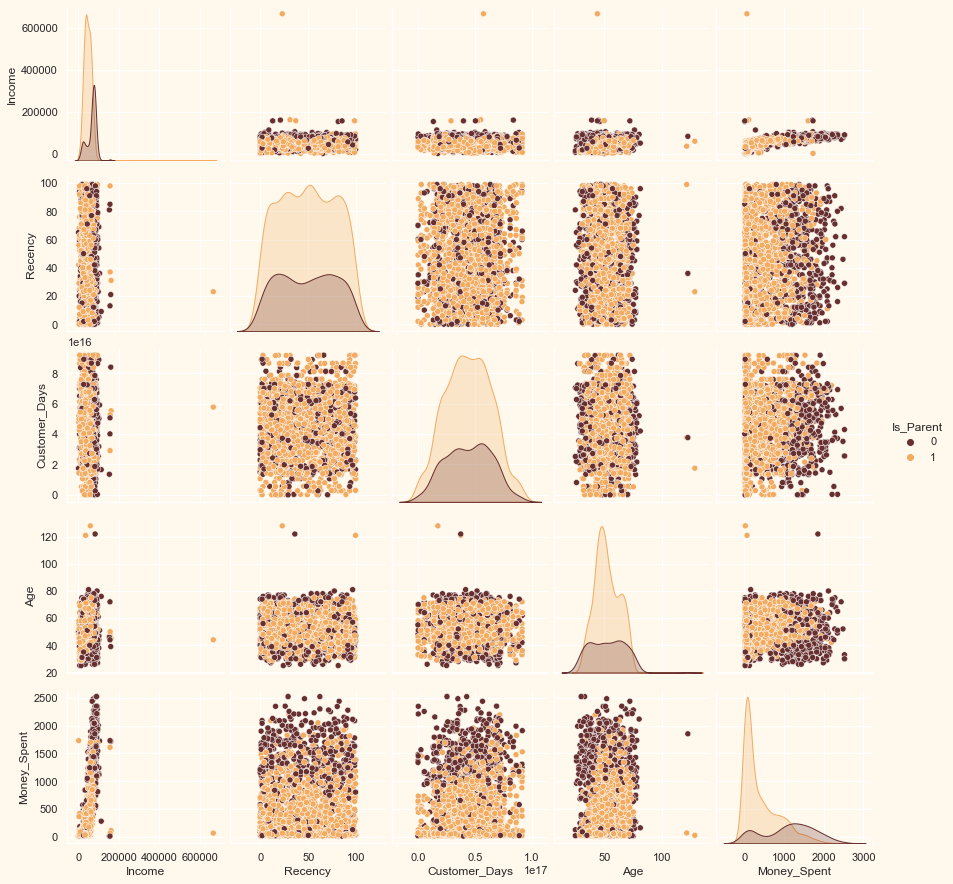

In [37]:
#plotting some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]      #https://www.imgonline.com.ua/eng/color-palette.php
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
plot_for = [ "Income", "Recency", "Customer_Days", "Age", "Money_Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[plot_for], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

###**Description:**
Clearly, there are a few outliers in the Income and Age features. so now outliers will be removed from data.

###**Dropping outliers**

In [38]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers:", len(data))

The total number of data-points after removing the outliers: 2212


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

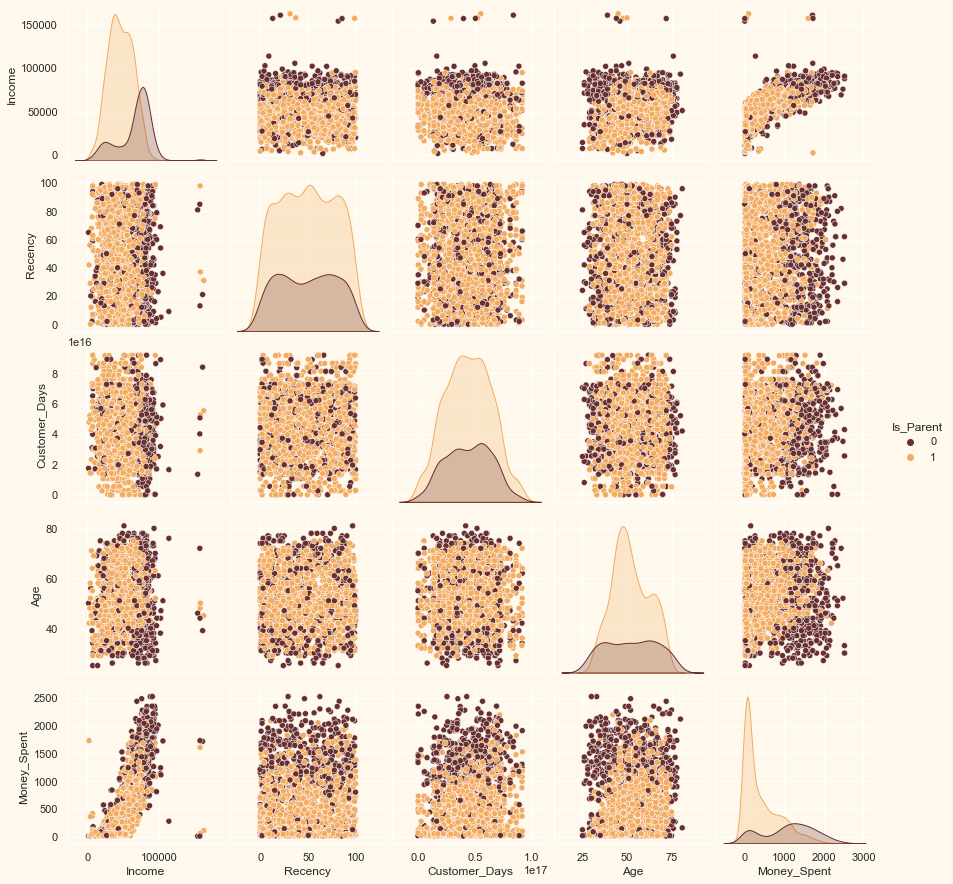

In [40]:
#plotting some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]      #https://www.imgonline.com.ua/eng/color-palette.php
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
plot_for = [ "Income", "Recency", "Customer_Days", "Age", "Money_Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[plot_for], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

<AxesSubplot:>

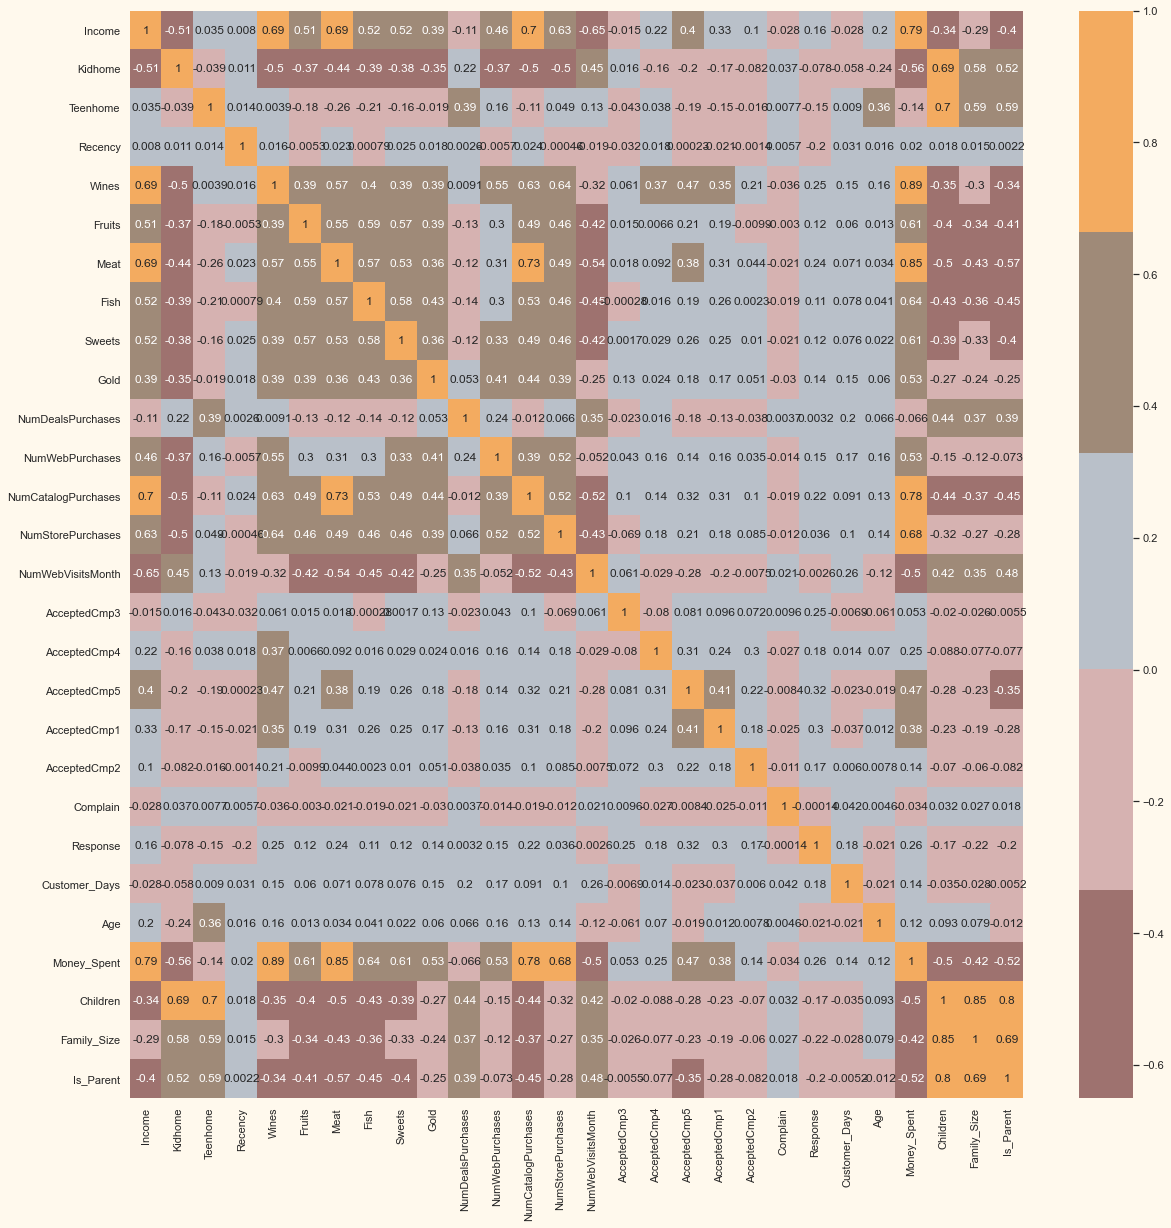

In [39]:
# Checkking correlation amongst the features. (Excluding the categorical attributes at this point)
# Correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

###**Conclusion:**


*   The data is quite clean and the new features have been included




#**Data Preprocessing**

**The following steps are applied to preprocess the data:**


*   Label encoding the categorical features
*   Scaling the features using the standard scaler
*   Creating a subset dataframe for dimensionality reduction






In [41]:
# Getting list of categorical variables
## variable cv contains the names of coulmns whose data type is object
cv = (data.dtypes == 'object')
cat_var = list(cv[cv].index)

print("Categorical variables in the dataset:", cat_var)

Categorical variables in the dataset: ['Education', 'Living_With']


In [48]:
cv[cv].index

Index(['Education', 'Living_With'], dtype='object')

In [49]:
print('Before label encoding')
print(data[['Education', 'Living_With']])

# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in  cat_var:
    data[i]=data[[i]].apply(LE.fit_transform)
print('********************************')
print('After label encoding')
print(data[['Education', 'Living_With']])

Before label encoding
         Education Living_With
0         Graduate       Alone
1         Graduate       Alone
2         Graduate     Partner
3         Graduate     Partner
4     Postgraduate     Partner
...            ...         ...
2235      Graduate     Partner
2236  Postgraduate     Partner
2237      Graduate       Alone
2238  Postgraduate     Partner
2239  Postgraduate     Partner

[2212 rows x 2 columns]
********************************
After label encoding
      Education  Living_With
0             0            0
1             0            0
2             0            1
3             0            1
4             1            1
...         ...          ...
2235          0            1
2236          1            1
2237          0            0
2238          1            1
2239          1            1

[2212 rows x 2 columns]


In [50]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [51]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Days,Age,Money_Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


#**Dimensionality Reduction:**
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**


*   Dimensionality reduction with PCA
*   Plotting the reduced dataframe



In [52]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.146360e-16,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-1.586033e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,3.776866e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


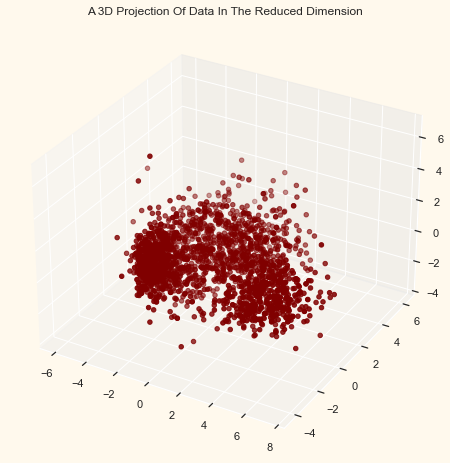

In [53]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#**Clustering:**
Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering:**

*   Elbow Method to determine the number of clusters to be formed
*   Clustering via Agglomerative Clustering
*  Examining the clusters formed via scatter plot








In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

###**conclusion:**
Result indicates that 4 will be an optimal number of clusters for this data. Now fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

##**3-D distribution of the clusters**

In [ ]:
# to examine the clusters formed plotting 3-D distribution of the clusters.
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.
For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions. 

In [ ]:
# Plotting group distribution of clustring
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

**The clusters seem to be fairly distributed.**

In [ ]:
pl = sns.scatterplot(data = data,x=data["Money_Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

##**Conclusion:**
**Income vs spending plot shows the clusters pattern:**

*   Cluster 0: high spending & average income
*   Cluster 1: high spending & high income
*   Cluster 2: low spending & low income
*   Cluster 3: high spending & low income



**Now we will be looking at the detailed distribution of clusters as per the various products in the data. Like: Wines, Fruits, Meat, Fish, Sweets and Gold**

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Money_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Money_Spent"], palette=pal)
plt.show()

###**Conclusion:**
From the above plot, it can be clearly seen that **cluster 1** is our biggest set of customers closely followed by **cluster 0**. We can explore what each cluster is spending on for the targeted marketing strategies.

#**Let us explore how previous campaigns did in past.**

In [ ]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ \
                       data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

##**Conclusion:**
There has not been an overwhelming response to the campaigns so far, very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

##**Conlusion:**

*   Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly






Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_Days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Money_Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

#**Final Conclusion:**
##**About Cluster 0:**

1.   Definetly a parent.
2.   having atmost 4 members in family and atleast 2 members.
3.   Single parent are the subset of this group.
4.   Most of them have teenager at home.
5.   Relatively older

##**About Cluster 1:**


1.   Definetly not a parent.
2.   Atmost 2 members in the family.
3.   Slightly majority of couple over singles
4.   Span all the ages.
5.   High income group.


##**About Cluster 2:**


1.   Majority of them are parents.
2.   Atmost 3 members in family
3.   Majority of them having one kid
4.   Relatively younger.

##**About Cluster 3:**


1.   Definetly a parent.
2.   Atmost 5 members and atleast 2 members in the family.
3.   Majority of them have a teenager at home.
4.   Relatively older
5.   A lower income group.















